### 3M company, stock price prediction and analysis

In [131]:
import pandas as pd
stock_data = pd.read_csv('all_stocks_5yr.csv')

In [132]:
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### filter out only given tickers

In [6]:
filtered = ['PSX','BLK','LKQ','BDX','MMM']

In [7]:
filters = (stock_data['Name'] == 'MMM') | (stock_data['Name'] == 'BLK') | (stock_data['Name'] == 'LKQ') | (stock_data['Name'] == 'BDX') | (stock_data['Name'] == 'PSX')

In [8]:
%matplotlib inline
stock_data = stock_data[filters]

In [9]:
stock_data[ stock_data['Name'] == 'MMM' ].head()

,date,open,high,low,close,volume,Name
380126,2013-02-08,102.34,103.330,102.0400,102.66,1937721,MMM
380127,2013-02-11,102.39,102.880,102.0401,102.62,1715444,MMM
380128,2013-02-12,102.66,103.590,102.6300,103.46,1927930,MMM
380129,2013-02-13,103.03,103.395,102.5800,102.86,1699804,MMM
380130,2013-02-14,102.43,103.140,102.2200,102.78,2217419,MMM


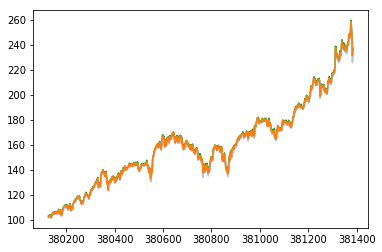

In [62]:
stock_data[ stock_data['Name'] == 'MMM' ].open.plot(color = tableau20[3])
stock_data[ stock_data['Name'] == 'MMM' ].high.plot(color = tableau20[4])
stock_data[ stock_data['Name'] == 'MMM' ].low.plot(color = tableau20[1])
stock_data[ stock_data['Name'] == 'MMM' ].close.plot(color = tableau20[2])

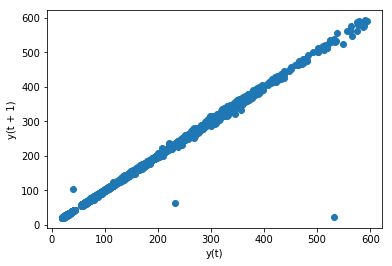

In [65]:
from pandas.plotting import lag_plot
lag_plot(stock_data.close)

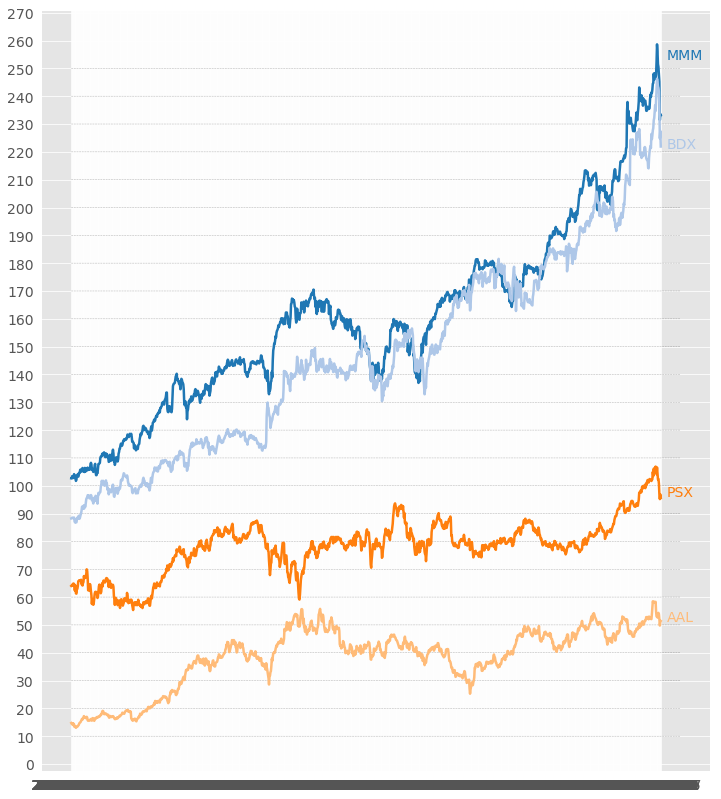

In [153]:
## PLOt PRICE OF DIFFERENT STOCKS

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(12, 14))    
majors = ['MMM','BDX','PSX','AAL']    

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


plt.yticks(range(0, 400, 10), [str(x)  for x in range(0, 400, 10)], fontsize=14)    
plt.xticks(fontsize=14) 


for y in range(10, 260, 10):    
    plt.plot(range(0, 1300), [y] * len(range(0, 1300)), "--", lw=0.5, color="black", alpha=0.3)    
  
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

for rank, column in enumerate(majors):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(stock_data[stock_data['Name'] == column].date.values,    
            stock_data[stock_data['Name'] == column].close.values,    
            lw=2.5, color=tableau20[rank])    
  
    # Add a text label to the right end of every line. Most of the code below    
    # is adding specific offsets y position because some labels overlapped.    
    y_pos = stock_data[stock_data['Name'] == column].close.values[-1]
    
    if column == "MMM":    
        y_pos += 20   
    elif column == "BDX":    
        y_pos -= 0.5   
    elif column == "PSX":    
        y_pos += 0.75    
  
    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.    
    plt.text(1270, y_pos, column, fontsize=14, color=tableau20[rank])
plt.savefig('stock.png')

In [10]:
len(stock_data['date'].unique())

1259

In [11]:
## TRAINER FOR TICKER MMM

In [12]:
cl = stock_data[stock_data['Name']=='MMM'].close

In [13]:
cl_unseen = cl[1000:].copy()
cl.drop(cl_unseen.index,inplace=True)

C:\Users\Acer\Anaconda3\envs\kerasenv\lib\site-packages\pandas\core\generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


In [14]:
from sklearn.preprocessing import MinMaxScaler
# cl = stock_data[stock_data['Name']=='MMM'].close
scl = MinMaxScaler()
#Scale the data
import numpy as np
cl= np.array(cl)
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

C:\Users\Acer\Anaconda3\envs\kerasenv\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


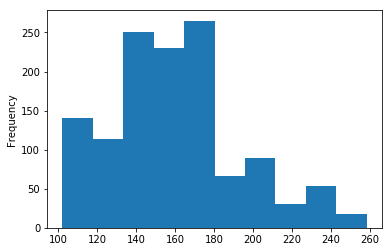

In [15]:
### PLOT THE MMM TRAINING AND TESTING DATA
stock_data[stock_data['Name'] =='MMM']['open'].plot(kind = 'hist')

PREPROCESSING, building time series data

In [17]:
### WE LOOKBACK 7 DAYS FOR CURRENT VALUE
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

X,y = processData(cl,7)

X_train,X_test = X[:int(X.shape[0]*0.80)] , X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)] , y[int(y.shape[0]*0.80):]

print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

793
199
793
199


In [22]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,GRU,Dropout
from sklearn.preprocessing import MinMaxScaler

In [117]:
#Build the model
model = Sequential()

model.add(GRU(8, dropout=0.2,
                recurrent_dropout=0.2,
                input_shape=(7,1), return_sequences = False  ) )

# model.add(LSTM(8, dropout=0.2,
#                 recurrent_dropout=0.2, return_sequences = False  ))

model.add(Dropout(0.1))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#just data for (Sample,Timestep,Features) , we have one feature as single datapoint
# so, if i did text, featurs would probablyt be 300 baSED ON WORD EMBEDDINGS
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

history = model.fit(X_train,y_train,epochs=120,validation_data=(X_test,y_test),shuffle=False)

Train on 793 samples, validate on 199 samples
Epoch 1/120
793/793 [==============================] - 4s 5ms/step - loss: 0.2848 - val_loss: 0.7648
Epoch 2/120
793/793 [==============================] - 0s 314us/step - loss: 0.2494 - val_loss: 0.6961
Epoch 3/120
793/793 [==============================] - 0s 368us/step - loss: 0.2117 - val_loss: 0.6009
Epoch 4/120
793/793 [==============================] - 0s 338us/step - loss: 0.1609 - val_loss: 0.4675
Epoch 5/120
793/793 [==============================] - 0s 322us/step - loss: 0.1042 - val_loss: 0.3036
Epoch 6/120
793/793 [==============================] - 0s 304us/step - loss: 0.0582 - val_loss: 0.1638
Epoch 7/120
793/793 [==============================] - 0s 312us/step - loss: 0.0393 - val_loss: 0.1016
Epoch 8/120
793/793 [==============================] - 0s 333us/step - loss: 0.0422 - val_loss: 0.0890
Epoch 9/120
793/793 [==============================] - 0s 317us/step - loss: 0.0440 - val_loss: 0.0870
Epoch 10/120
793/793 [=======

793/793 [==============================] - 0s 338us/step - loss: 0.0347 - val_loss: 0.0503
Epoch 80/120
793/793 [==============================] - 0s 311us/step - loss: 0.0312 - val_loss: 0.0524
Epoch 81/120
793/793 [==============================] - 0s 298us/step - loss: 0.0301 - val_loss: 0.0489
Epoch 82/120
793/793 [==============================] - 0s 304us/step - loss: 0.0314 - val_loss: 0.0470
Epoch 83/120
793/793 [==============================] - 0s 323us/step - loss: 0.0309 - val_loss: 0.0466
Epoch 84/120
793/793 [==============================] - 0s 318us/step - loss: 0.0351 - val_loss: 0.0467
Epoch 85/120
793/793 [==============================] - 0s 307us/step - loss: 0.0312 - val_loss: 0.0485
Epoch 86/120
793/793 [==============================] - 0s 334us/step - loss: 0.0303 - val_loss: 0.0484
Epoch 87/120
793/793 [==============================] - 0s 302us/step - loss: 0.0335 - val_loss: 0.0457
Epoch 88/120
793/793 [==============================] - 0s 309us/step - loss:

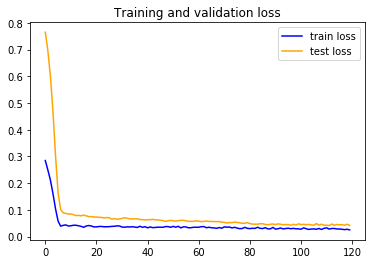

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'blue', label='train loss')
plt.plot(epochs, val_loss, 'orange', label='test loss')
plt.title('Training and validation loss')
plt.legend()

In [119]:
### PLOT PREDICTIONS ###
model.predict(cl_unseen.values.reshape(-1,1)[:7].reshape(1,7,1))

array([[ 1.32718432]], dtype=float32)

In [120]:
predictions = []
for i in range(259):
    if i < 253:
        val = scl.transform(cl_unseen.values.reshape(-1,1))[i : i + 7]
        predicted = model.predict(val.reshape(1,7,1))
        predictions.append(scl.inverse_transform(predicted))

In [121]:
y_vals = scl.inverse_transform(cl)

In [122]:
len(y_vals) + len(predictions)

1253

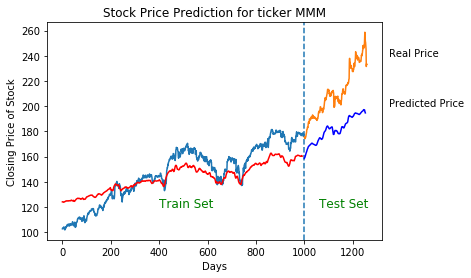

In [128]:
xcoords = [1000]
for xc in xcoords:
    plt.axvline(x=xc,linestyle='--')
    
plt.title('Stock Price Prediction for ticker MMM')
plt.xlabel('Days')
plt.ylabel('Closing Price of Stock')
plt.text(400,120,'Train Set',withdash=True,color='green', fontsize=12)
plt.text(1060,120,'Test Set',withdash=True,color='green', fontsize=12)

plt.text(1350,240,'Real Price',fontsize=10)
plt.text(1350,200,'Predicted Price',fontsize=10)
plt.plot(np.arange(0,1000),y_vals.reshape( 1, len(cl) )[0] )
plt.plot( range(1000,1253)  ,np.array(predictions).reshape(1,253)[0] , color = 'b'  )
plt.plot( range(1000,1259)  ,cl_unseen.values  )
plt.plot(range(793), scl.inverse_transform(model.predict(X_train)).reshape(1,-1)[0] , color = 'r' )
plt.plot(range(793,793+199), scl.inverse_transform(model.predict(X_test)).reshape(1,-1)[0] , color = 'r'  )

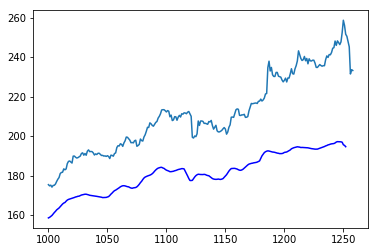

In [129]:
plt.plot( range(1000,1253)  ,np.array(predictions).reshape(1,253)[0] , color = 'b'  )
plt.plot( range(1000,1259)  ,cl_unseen.values  )

In [124]:
scl.transform(np.array(predictions).reshape(-1,1)).reshape(1,-1)[0]

array([ 0.71345747,  0.71711504,  0.72270942,  0.72908044,  0.73857284,
        0.74753928,  0.75534558,  0.76452255,  0.77094674,  0.77644777,
        0.78510475,  0.79383492,  0.8018074 ,  0.80789542,  0.81129241,
        0.81974411,  0.82681584,  0.83090067,  0.83333445,  0.83551407,
        0.83797526,  0.84056473,  0.84320855,  0.84646749,  0.84805846,
        0.85091639,  0.85170412,  0.85509729,  0.85890627,  0.86055493,
        0.86221528,  0.86404109,  0.86398244,  0.86220837,  0.86000371,
        0.85720277,  0.85618329,  0.85553885,  0.85437417,  0.8529532 ,
        0.85213065,  0.85037708,  0.84898686,  0.84701753,  0.84596276,
        0.84491873,  0.84261751,  0.84317303,  0.84373879,  0.84375334,
        0.84611273,  0.84881473,  0.85597277,  0.86455321,  0.87153649,
        0.8796885 ,  0.88653278,  0.89000082,  0.89478517,  0.8989377 ,
        0.90514755,  0.91099191,  0.91494298,  0.91762924,  0.91802621,
        0.91670346,  0.91394973,  0.91185927,  0.91086149,  0.90

# Calculate mean square error

In [125]:
np.sqrt(np.sum(np.square(scl.transform(cl_unseen.values.reshape(-1,1)).reshape(1,-1)[0][6:] - scl.transform(np.array(predictions).reshape(-1,1)).reshape(1,-1)[0]))) 

6.4108649710015513